In [1]:
!pip install kagglehub==0.3.3


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub
import os
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

c:\Users\atodd\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version of kaggle dataset
path = kagglehub.dataset_download("alistairking/recyclable-and-household-waste-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\atodd\.cache\kagglehub\datasets\alistairking\recyclable-and-household-waste-classification\versions\1


In [4]:
path

'C:\\Users\\atodd\\.cache\\kagglehub\\datasets\\alistairking\\recyclable-and-household-waste-classification\\versions\\1'

In [5]:
!ls /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
!rm /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1/README.txt

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!ls /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!ls /root/.cache/kagglehub/datasets/alistairking/recyclable-and-household-waste-classification/versions/1/images/images

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Data Exploration 

The following code blocks loads and organizes images by category and setting (either "default" or "real_world"). The variable `class_path` defines the main directory containing the images. The `classes` list retrieves the category names within this path. Three lists—`image_paths`, `labels`, and `d_r` are initialized to store the image paths, their respective categories/classes, and the setting type. A nested loop iterates over each category and subfolder ("default" and "real_world"), appending the image paths, category labels, and setting identifiers to these lists. 

In [9]:
# Get image paths and create lists to populate later
class_path = path + '/images' + '/images'
classes = os.listdir(class_path)
image_paths = []
labels = [] # Trash category associated with each image
d_r = [] # default (studio/standard) vs real world img

print(classes)

['aerosol_cans', 'aluminum_food_cans', 'aluminum_soda_cans', 'cardboard_boxes', 'cardboard_packaging', 'clothing', 'coffee_grounds', 'disposable_plastic_cutlery', 'eggshells', 'food_waste', 'glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'paper_cups', 'plastic_cup_lids', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_shopping_bags', 'plastic_soda_bottles', 'plastic_straws', 'plastic_trash_bags', 'plastic_water_bottles', 'shoes', 'steel_food_cans', 'styrofoam_cups', 'styrofoam_food_containers', 'tea_bags']


In [10]:
# Access image folders and populate lists with needed data
for i, label in enumerate(classes):
    class_dir = os.path.join(class_path, label)
    for subfolder in ['default', 'real_world']:
        subfolder_dir = os.path.join(class_dir, subfolder)
        image_names = os.listdir(subfolder_dir)
        
        for image_name in image_names:
            d_r.append(subfolder)
            image_paths.append(os.path.join(subfolder_dir, image_name))
            labels.append(label)

In [11]:
# Get image sizes of every image and populate list
image_sizes = []
for image_path in image_paths:
    im = Image.open(image_path)
    image_sizes.append(im.size)

In [12]:
# Create a dataframe with image paths, labels, sizes, and categorization for visualization
columnDict = {'image_path': image_paths, 'label': labels, 'image_size': image_sizes, 'default_vs_real_world': d_r}
df = pd.DataFrame(columnDict)

print(df.head())

                                          image_path         label  \
0  C:\Users\atodd\.cache\kagglehub\datasets\alist...  aerosol_cans   
1  C:\Users\atodd\.cache\kagglehub\datasets\alist...  aerosol_cans   
2  C:\Users\atodd\.cache\kagglehub\datasets\alist...  aerosol_cans   
3  C:\Users\atodd\.cache\kagglehub\datasets\alist...  aerosol_cans   
4  C:\Users\atodd\.cache\kagglehub\datasets\alist...  aerosol_cans   

   image_size default_vs_real_world  
0  (256, 256)               default  
1  (256, 256)               default  
2  (256, 256)               default  
3  (256, 256)               default  
4  (256, 256)               default  


In [13]:
print("Number of classes:", len(df['label'].unique()))
print("Number of images:", len(df))
print("Unique image sizes:", df['image_size'].unique())

Number of classes: 30
Number of images: 15000
Unique image sizes: [(256, 256)]


# Plotting Things

This code generates a histogram to visualize the distribution of image sizes in the dataset:

Distribution of image sizes:


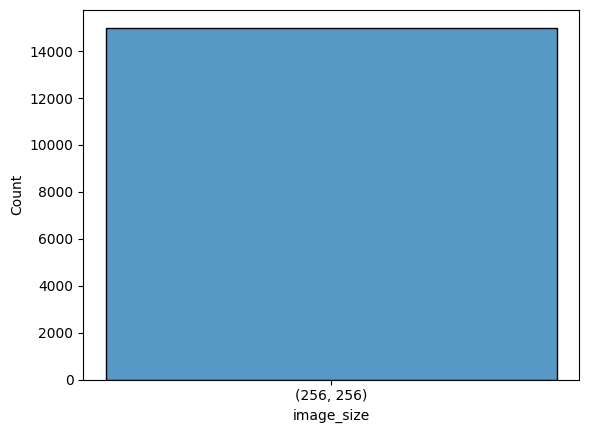

In [14]:
# What an interesting plot!
plottable_df = df.copy()
plottable_df['image_size'] = df['image_size'].astype('string')
print("Distribution of image sizes:")
sns.histplot(data=plottable_df, x ='image_size')
plt.show()

The following code counts the number of images per class and visualizes the results with a count plot:

Number of images per class:


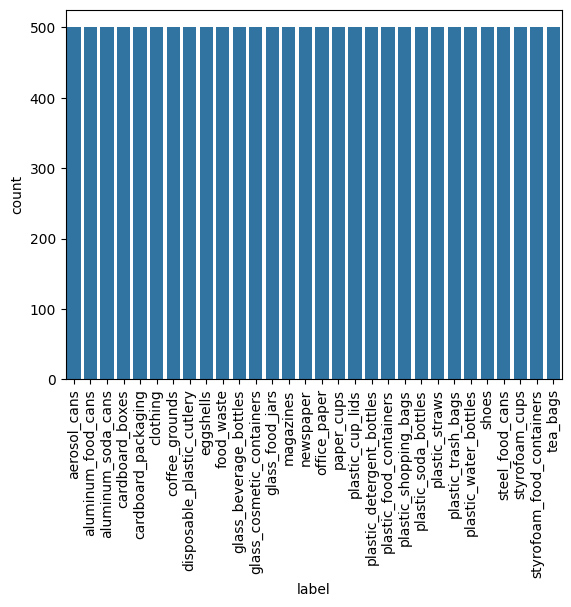

In [15]:
label_counts = plottable_df['label'].value_counts()
tiny_df = pd.DataFrame(label_counts)
print("Number of images per class:")
sns.countplot(data=plottable_df, x ='label')
plt.xticks(rotation=90)
plt.show()

The following block randomly selects one sample image from each class in the dataset and displays them in a grid format, showing the images alongside their respective labels:

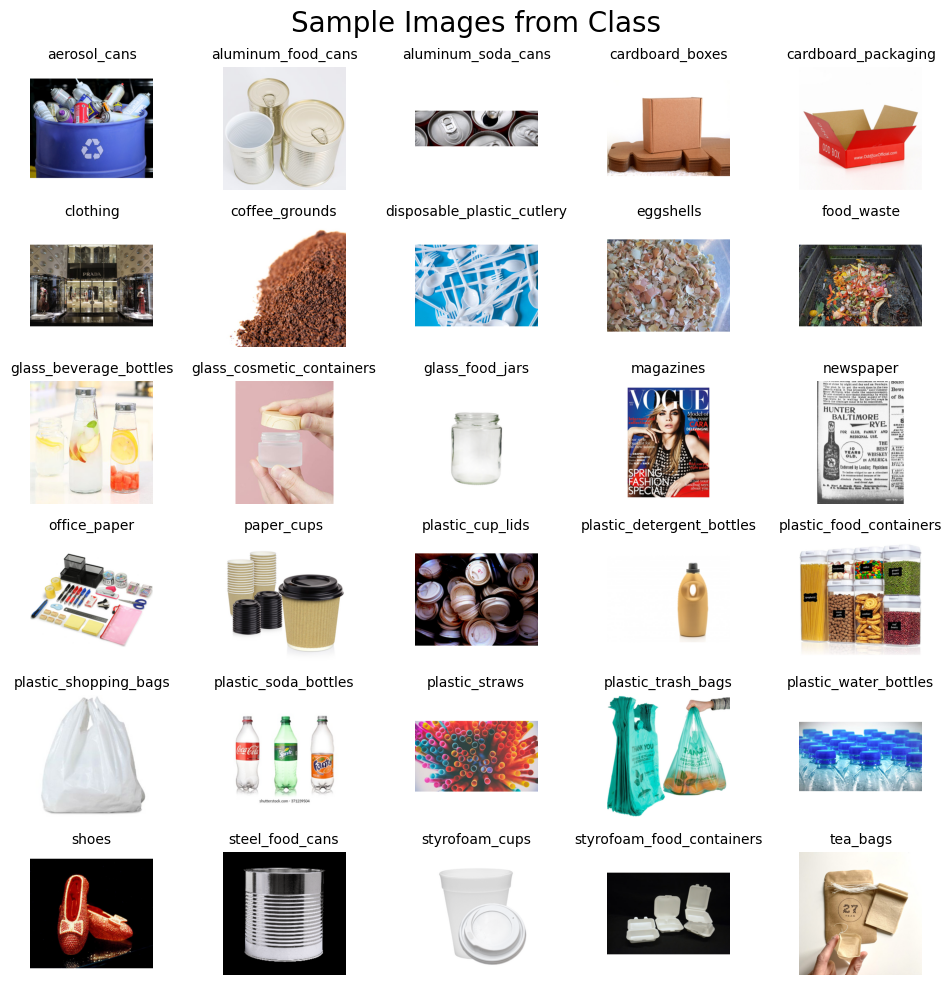

In [16]:
sample = df.groupby('label').sample(n=1).reset_index(drop=True)
num_samples = len(sample)

plt.figure(figsize=(10, 10))
plt.suptitle('Sample Images from Class', fontsize=20) 

for i in range(num_samples):
    img = Image.open(sample.iloc[i]['image_path']) 
    plt.subplot(6, 5, i + 1)
    plt.imshow(img)
    plt.title(sample.iloc[i]['label'], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

Based on the data exploration conducted above, including the plot of image size distribution and the visualization of sample images, we observe that all images are of the same size (256x256). This uniformity eliminates the need for resizing or cropping to ensure consistent image dimensions. 

# Next Steps: More Data Preprocessing 

Our main goal is to classify waste items into three distinct categories: 

- **Landfill**: Items that are non-recyclable or non-compostable and should be disposed of in landfills. 
- **Recyclable**: Items that can be recycled, such as plastics, metals, glass, and paper products. 
- **Compost**: Items that can decompose and be used as compost.  

As a preprocessing step, we plan on combining the existing 30 waste categories into these broader categories. Additionally, we plan on creating a train test split using ONLY the default image data (comprised of studio images and stock photos of trash) for now. We will also apply min-max normalization to keep our image pixel data on a scale between 0 and 1. After normalizing, we will apply a filter to decrease noise in our images (we haven't yet decided on the best option yet, but it'll likely be either a gaussian or median filter).

| label | category/class |
|:------|:---------------|
| `'aerosol_cans'` | if empty recyclable, otherwise landfill |
| `'aluminum_food_cans'` | recyclable |
| `'aluminum_soda_cans'` | recyclable |
| `'cardboard_boxes'` | recyclable |
| `'cardboard_packaging'` | recyclable |
| `'clothing'` | landfill |
| `'coffee_grounds'` | compost |
| `'disposable_plastic_cutlery'` | landfill |
| `'eggshells'` | compost |
| `'food_waste'` | compost |
| `'glass_beverage_bottles'` | recyclable |
| `'glass_cosmetic_containers'` | recyclable |
| `'glass_food_jars'` | recyclable |
| `'magazines'` | recyclable |
| `'newspaper'` | recyclable |
| `'office_paper'` | recyclable |
| `'paper_cups'` | recyclable as long as not wax coated |
| `'plastic_cup_lids'` | recyclable? |
| `'plastic_detergent_bottles'` | recyclable |
| `'plastic_food_containers'` | recyclable |
| `'plastic_shopping_bags'` | landfill |
| `'plastic_soda_bottles'` | recyclable |
| `'plastic_straws'` | recyclable |
| `'plastic_trash_bags'` | landfill |
| `'plastic_water_bottles'` | recyclable |
| `'shoes'` | landfill |
| `'steel_food_cans'` | recyclable |
| `'styrofoam_cups'` | landfill |
| `'styrofoam_food_containers'` | landfill |
| `'tea_bags'` | compost if plastic free |

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7bcfc1ee-f9d0-4fbd-8938-ed6b0c0637f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [17]:
# combine categories
def combine_categorization(label):
  landfill = ['clothing', 'disposable_plastic_cutlery', 'plastic_shopping_bags', 'plastic_trash_bags', 'shoes', 'styrofoam_cups', 'styrofoam_food_containers']
  recyclable = ['aerosol_cans', 'aluminum_food_cans', 'aluminum_soda_cans', 'cardboard_boxes', 'cardboard_packaging', 'glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'paper_cups', 'plastic_cup_lids', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_soda_bottles', 'plastic_straws', 'plastic_water_bottles', 'steel_food_cans']
  compost = ['coffee_grounds', 'eggshells', 'food_waste', 'tea_bags']
  if (label in landfill):
    return 'landfill'
  if (label in recyclable):
    return 'recyclable'
  if (label in compost):
    return 'compost'
  print("Uncategorized Label:", label)
  return label

df['label'] = df['label'].apply(combine_categorization)
print(df['label'].unique())


['recyclable' 'landfill' 'compost']


In [18]:
df.head()

,image_path,label,image_size,default_vs_real_world
0,C:\Users\atodd\.cache\kagglehub\datasets\alist...,recyclable,"(256, 256)",default
1,C:\Users\atodd\.cache\kagglehub\datasets\alist...,recyclable,"(256, 256)",default
2,C:\Users\atodd\.cache\kagglehub\datasets\alist...,recyclable,"(256, 256)",default
3,C:\Users\atodd\.cache\kagglehub\datasets\alist...,recyclable,"(256, 256)",default
4,C:\Users\atodd\.cache\kagglehub\datasets\alist...,recyclable,"(256, 256)",default


In [19]:
X = df['image_path']
y = df['label'] 

In [20]:
# split the dataset with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [21]:
# Finding the min and max pixel value in the training data
min_val = float('inf')
max_val = float('-inf')

for image_path in X_train:  
    image = Image.open(image_path)
    image_array = np.array(image)

    image_min = image_array.min()
    image_max = image_array.max()

    min_val = min(min_val, image_min)
    max_val = max(max_val, image_max)

print("Min Pixel Value:", min_val)
print("Max Pixel Value:", max_val)

Min Pixel Value: 0
Max Pixel Value: 255


In [22]:
def normalize_image(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)

    # normalize with min-max scaling
    normalized_image = (image_array - min_val) / (max_val - min_val)
    return normalized_image

X_train_normalized = X_train.apply(normalize_image)
X_test_normalized = X_test.apply(normalize_image)

In [25]:
# Flatten each image to create 1D feature vectors
# X_train_flat = np.array([image.flatten() for image in X_train_normalized])
# X_test_flat = np.array([image.flatten() for image in X_test_normalized])

image_size = 256 * 256 * 3
X_train_flat = np.memmap('X_train_flat.dat', dtype='float32', mode='w+', shape=(len(X_train_normalized), image_size))
X_test_flat = np.memmap('X_test_flat.dat', dtype='float32', mode='w+', shape=(len(X_test_normalized), image_size))

# Fill in the memory-mapped arrays
for i, image in enumerate(X_train_normalized):
    X_train_flat[i] = image.flatten()

for i, image in enumerate(X_test_normalized):
    X_test_flat[i] = image.flatten()

In [26]:
sample_image = X_train_normalized.iloc[1]
print("Normalized Image Shape:", sample_image.shape)
print("Pixel Value Range:", sample_image.min(), "to", sample_image.max(), "\n")

original_sample_image = np.array(Image.open(X_train.iloc[1]))
print("Normalized Image Shape:", original_sample_image.shape)
print("Pixel Value Range:", original_sample_image.min(), "to", original_sample_image.max())

Normalized Image Shape: (256, 256, 3)
Pixel Value Range: 0.0 to 1.0 

Normalized Image Shape: (256, 256, 3)
Pixel Value Range: 0 to 255


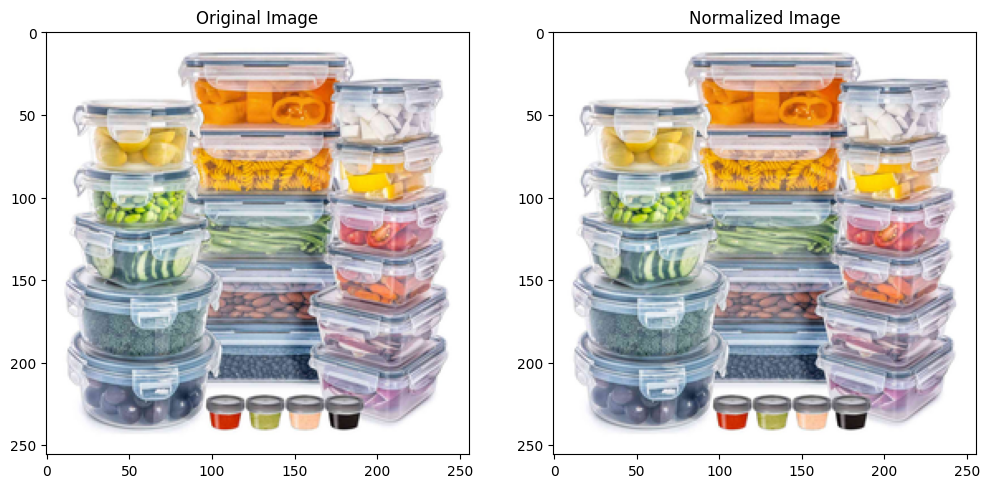

In [27]:
sample_image_path = X_train.iloc[1] 
original_image = Image.open(sample_image_path)
original_image = np.array(original_image)

normalized_image = X_train_normalized.iloc[1]
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

# Normalized Image
plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title("Normalized Image")

plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_flat, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf_model.predict(X_test_flat)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.8316666666666667


In [33]:
y_train_pred = rf_model.predict(X_train_flat)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: ", train_accuracy)

Training Accuracy:  0.9995833333333334


Ground Truth and Predictions
Ground Truth and Predictions For Training Set
Ground Truth: recyclable
Prediction: recyclable
Ground Truth: landfill
Prediction: landfill
Ground Truth: recyclable
Prediction: recyclable
Ground Truth: landfill
Prediction: landfill
Ground Truth: recyclable
Prediction: recyclable
Ground Truth and Predictions For Testing Set
Ground Truth: recyclable
Prediction: recyclable
Ground Truth: recyclable
Prediction: recyclable
Ground Truth: compost
Prediction: compost
Ground Truth: landfill
Prediction: recyclable
Ground Truth: landfill
Prediction: landfill


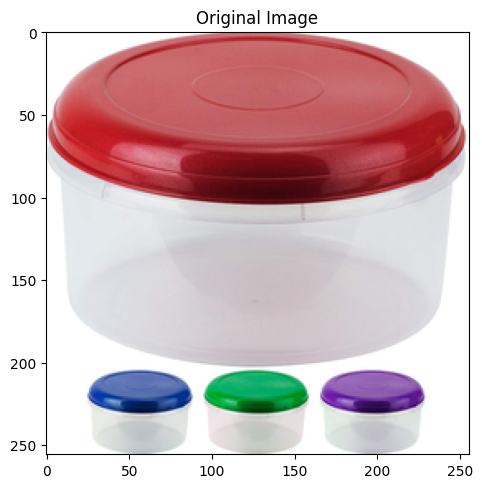

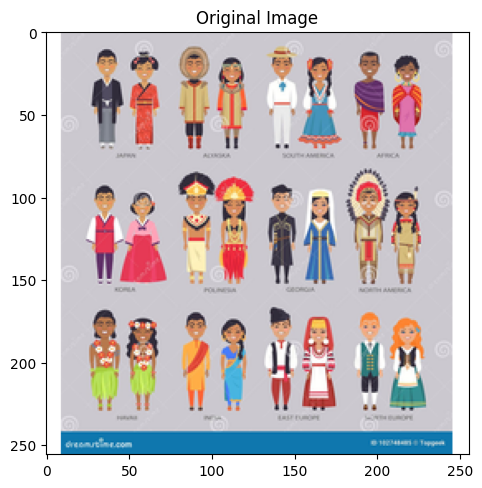

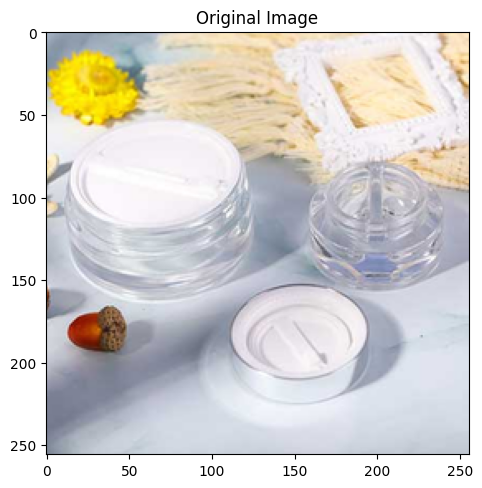

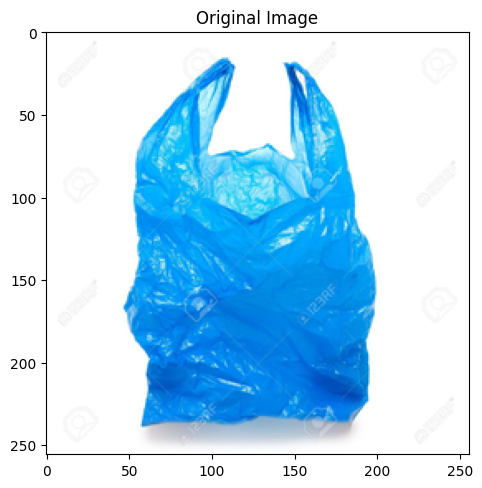

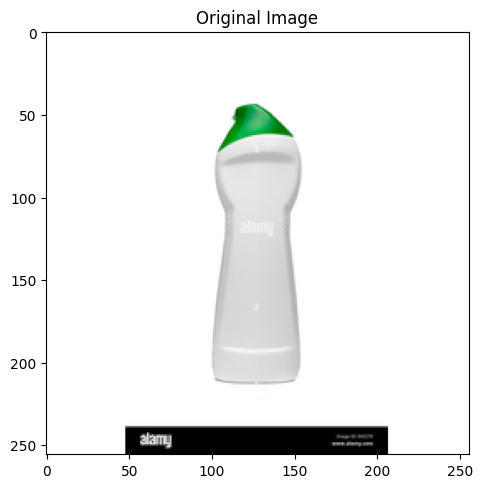

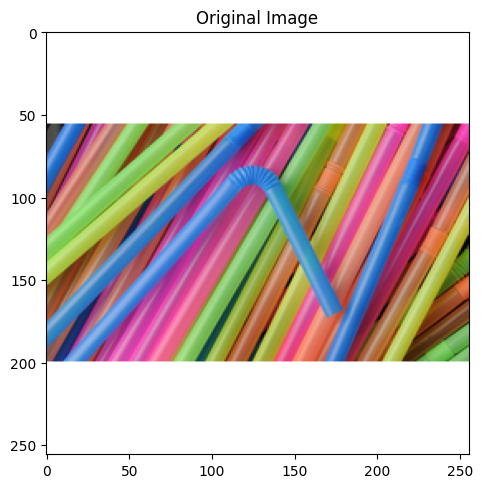

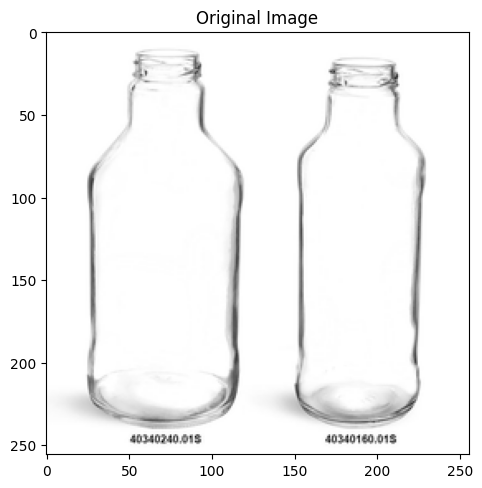

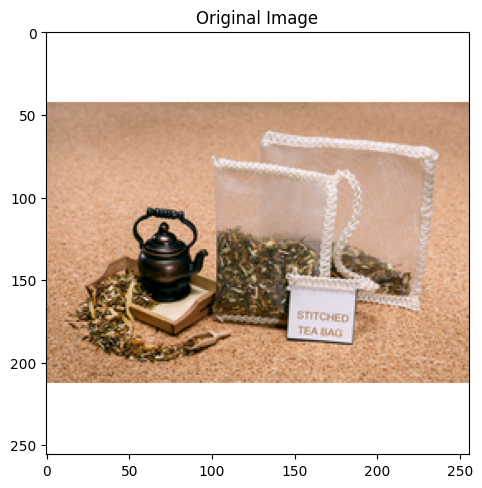

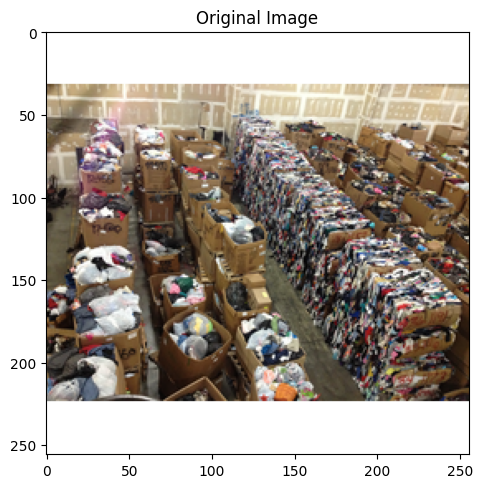

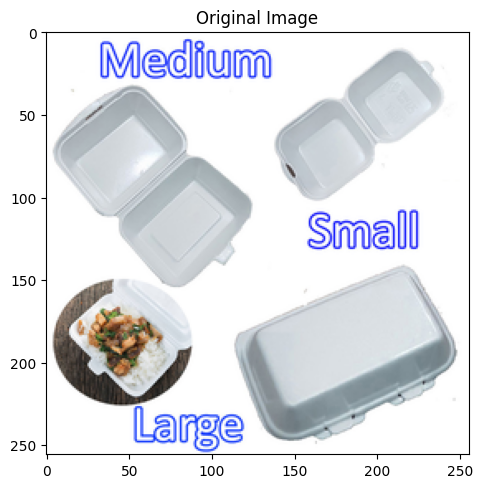

In [43]:
# example ground truth and predictions for train, validation and test
print("Ground Truth and Predictions")
print("Ground Truth and Predictions For Training Set")
length = len(y_train)
for i in range(0, length, int(length/5)):
  sample_image_path = X_train.iloc[i] 

  original_image = Image.open(sample_image_path)
  original_image = np.array(original_image)
  plt.figure(figsize=(12, 6))

  # Original Image
  plt.subplot(1, 2, 1)
  plt.imshow(original_image)
  plt.title("Original Image")
  print("Ground Truth:", y_train.iloc[i])
  print("Prediction:", y_train_pred[i])

print("Ground Truth and Predictions For Testing Set")
length = len(y_pred)
for i in range(0, length, int(length/5)):
  sample_image_path = X_test.iloc[i] 

  original_image = Image.open(sample_image_path)
  original_image = np.array(original_image)
  plt.figure(figsize=(12, 6))

  # Original Image
  plt.subplot(1, 2, 1)
  plt.imshow(original_image)
  plt.title("Original Image")
  print("Ground Truth:", y_test.iloc[i])
  print("Prediction:", y_pred[i])